### Contents

Import Data

Prepare Data

Elbow Technique

K-means

### Import Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# ensure graphs are shown inline
%matplotlib inline

In [3]:
# create path
path = r'/Users/kaitlinkendrick/Documents/Data Analysis/Craft Beer Analysis'

In [4]:
# import data
rus = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'RUS.csv'), index_col = False)

In [5]:
other = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'non rus.csv'), index_col = False)

In [6]:
rus.shape

(19614, 23)

In [7]:
other.shape

(31828, 23)

In [8]:
rus.head()

,Unnamed: 0,Product_code,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV,Amount,...,Missing_price,Missing_vendor,Missing_unit,Missing_country,Missing_size,Missing_ABV,Missing_amount,Missing_sale,Missing_discount,Missing_profit
0,0,5028,NaN,1 Symbiotica Apple 0.375,300.0,Pieces,RUS,0.375,4.5,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5028,NaN,1 Symbiotica Apple 0.375,300.0,Pieces,RUS,0.375,4.5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5028,NaN,1 Symbiotica Apple 0.375,300.0,Pieces,RUS,0.375,4.5,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,RUS,0.330,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,RUS,0.330,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
other.head()

,Unnamed: 0,Product_code,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV,Amount,...,Missing_price,Missing_vendor,Missing_unit,Missing_country,Missing_size,Missing_ABV,Missing_amount,Missing_sale,Missing_discount,Missing_profit
0,12,1340,NaN,1000 IBU Imperial IPA Barrel l,960.0,Liters,NaN,1.000,9.6,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,4372,NaN,18th Street Brewery,NaN,NaN,USA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14,4302,NaN,18th Street Brewery Deal With The Devil 0.473,630.0,Pieces,USA,0.473,8.5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15,4302,NaN,18th Street Brewery Deal With The Devil 0.473,630.0,Pieces,USA,0.473,8.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16,4302,NaN,18th Street Brewery Deal With The Devil 0.473,630.0,Pieces,USA,0.473,8.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
rus.columns

Index(['Unnamed: 0', 'Product_code', 'Vendor_code', 'Name', 'Retail_price',
       'Base_unit', 'Country_of_Origin', 'Size', 'ABV', 'Amount',
       'Sale_amount', 'Discount_amount', 'Profit', 'Missing_price',
       'Missing_vendor', 'Missing_unit', 'Missing_country', 'Missing_size',
       'Missing_ABV', 'Missing_amount', 'Missing_sale', 'Missing_discount',
       'Missing_profit'],
      dtype='object')

In [11]:
other.columns

Index(['Unnamed: 0', 'Product_code', 'Vendor_code', 'Name', 'Retail_price',
       'Base_unit', 'Country_of_Origin', 'Size', 'ABV', 'Amount',
       'Sale_amount', 'Discount_amount', 'Profit', 'Missing_price',
       'Missing_vendor', 'Missing_unit', 'Missing_country', 'Missing_size',
       'Missing_ABV', 'Missing_amount', 'Missing_sale', 'Missing_discount',
       'Missing_profit'],
      dtype='object')

### Prepare Data

In [12]:
# create new dataframe with only numerical columns
rus2 = rus[['Product_code', 'Retail_price', 'Size', 'ABV', 'Amount', 'Sale_amount', 'Profit']].copy()

In [13]:
rus2.head()

,Product_code,Retail_price,Size,ABV,Amount,Sale_amount,Profit
0,5028,300.0,0.375,4.5,2.0,420.00,140.00
1,5028,300.0,0.375,4.5,4.0,960.00,400.00
2,5028,300.0,0.375,4.5,5.0,1440.00,740.00
3,4846,200.0,0.330,3.0,4.0,412.23,52.23
4,4846,200.0,0.330,3.0,2.0,360.00,180.00


In [14]:
other2 = other[['Product_code', 'Retail_price', 'Size', 'ABV', 'Amount', 'Sale_amount', 'Profit']].copy()

In [15]:
other2.head()

,Product_code,Retail_price,Size,ABV,Amount,Sale_amount,Profit
0,1340,960.0,1.000,9.6,0.5,NaN,-195.35
1,4372,NaN,NaN,NaN,NaN,NaN,NaN
2,4302,630.0,0.473,8.5,4.0,1133.98,-214.02
3,4302,630.0,0.473,8.5,1.0,409.49,72.49
4,4302,630.0,0.473,8.5,1.0,377.85,40.85


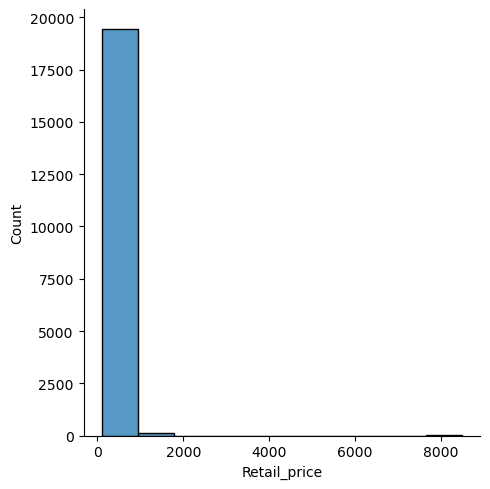

In [16]:
# check for extreme values
sns.displot(rus2['Retail_price'], bins=10)

In [17]:
# create and remove subset of Retail_price over 1500
rus3 = rus2[rus2['Retail_price'] > 1500]

In [18]:
rus3

,Product_code,Retail_price,Size,ABV,Amount,Sale_amount,Profit
8169,2948,8484.85,1.0,4.9,0.033,166.55,26.55
8170,2948,8484.85,1.0,4.9,0.033,223.33,83.33
8171,2948,8484.85,1.0,4.9,0.066,442.91,162.91
8172,2948,8484.85,1.0,4.9,0.066,560.00,280.00
8173,2948,8484.85,1.0,4.9,0.099,679.51,259.51
8174,2948,8484.85,1.0,4.9,0.033,280.00,140.00
8175,2948,8484.85,1.0,4.9,0.033,222.22,82.22
8176,2948,8484.85,1.0,4.9,0.033,220.00,80.00
8177,2948,8484.85,1.0,4.9,0.033,223.48,83.48
8178,2948,8484.85,1.0,4.9,0.033,195.00,55.00


In [19]:
rus3.shape

(12, 7)

In [20]:
rus4 = rus2.drop(rus3.index)

In [21]:
rus4.shape

(19602, 7)

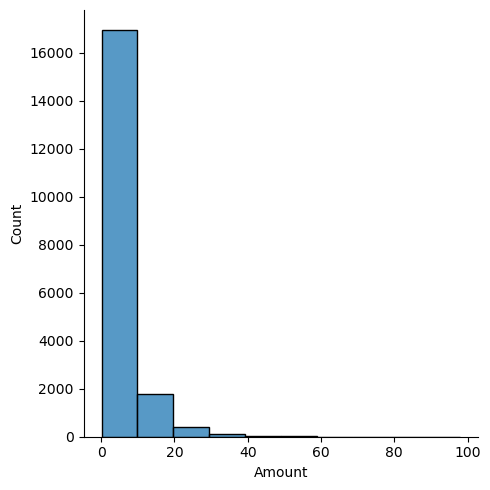

In [22]:
sns.displot(rus4['Amount'], bins=10)

In [23]:
# create and remove subset of Amount over 30
rus5 = rus4[rus4['Amount'] > 30]

In [24]:
rus5.shape

(177, 7)

In [25]:
rus6 = rus4.drop(rus5.index)

In [26]:
rus6.shape

(19425, 7)

In [27]:
# remove rows with NaN data
rus6.isnull().sum()

Product_code       0
Retail_price      50
Size            3181
ABV             3205
Amount           294
Sale_amount      308
Profit           299
dtype: int64

In [28]:
rus6.dropna(subset = ['Retail_price', 'Size', 'ABV', 'Amount', 'Sale_amount', 'Profit'], inplace=True)

In [29]:
rus6.isnull().sum()

Product_code    0
Retail_price    0
Size            0
ABV             0
Amount          0
Sale_amount     0
Profit          0
dtype: int64

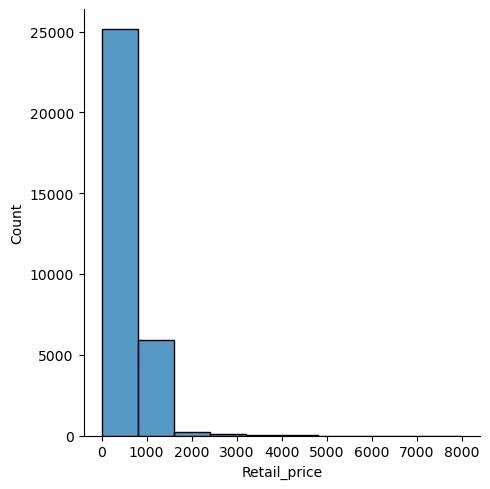

In [30]:
# check for extreme values
sns.displot(other2['Retail_price'], bins=10)

In [31]:
# create and remove subset of Retail_price over 1500
other3 = other2[other2['Retail_price'] > 1500]

In [32]:
other3.shape

(686, 7)

In [33]:
other4 = other2.drop(other3.index)

In [34]:
other4.shape

(31142, 7)

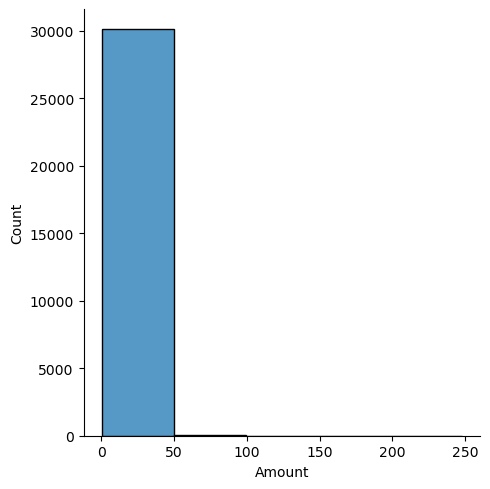

In [35]:
sns.displot(other4['Amount'], bins=5)

In [36]:
# create and remove subset of Amount over 50
other5 = other4[other4['Amount'] > 50]

In [37]:
other5.shape

(31, 7)

In [38]:
other6 = other4.drop(other5.index)

In [39]:
other6.shape

(31111, 7)

In [40]:
# remove rows with NaN data
other6.isnull().sum()

Product_code       0
Retail_price     387
Size            3141
ABV             3132
Amount          1002
Sale_amount     1039
Profit          1011
dtype: int64

In [41]:
other6.dropna(subset = ['Retail_price', 'Size', 'ABV', 'Amount', 'Sale_amount', 'Profit'], inplace=True)

In [42]:
other6.isnull().sum()

Product_code    0
Retail_price    0
Size            0
ABV             0
Amount          0
Sale_amount     0
Profit          0
dtype: int64

### Elbow Technique

In [43]:
# create range of potential clusters to find the elbow for the k-means
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [44]:
# create score representing rate of variation for russia
score = [kmeans[i].fit(rus6).score(rus6) for i in range(len(kmeans))]

/Users/kaitlinkendrick/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kaitlinkendrick/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kaitlinkendrick/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kaitlinkendrick/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

In [45]:
score

[-129047738752.24419,
 -62282496209.855545,
 -44741107816.94231,
 -29673169748.161415,
 -24370205729.58053,
 -19793845415.266785,
 -16776829473.707817,
 -14448331258.904718,
 -12834589920.35307]

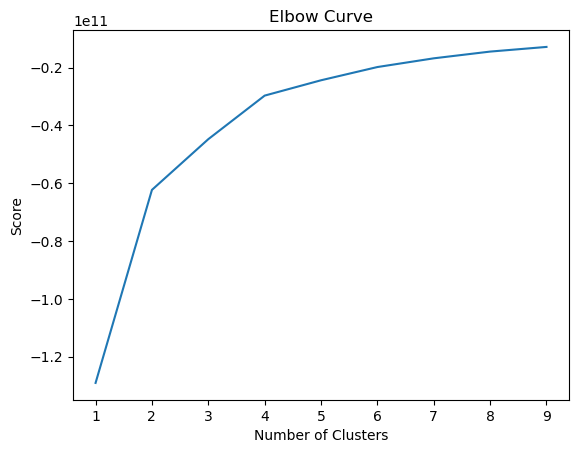

In [46]:
# plot elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [47]:
# create score representing rate of variation for others
score = [kmeans[i].fit(other6).score(other6) for i in range(len(kmeans))]

/Users/kaitlinkendrick/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kaitlinkendrick/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kaitlinkendrick/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kaitlinkendrick/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

In [48]:
score

[-249340670054.3662,
 -121420033314.04922,
 -86776373225.84784,
 -57128529768.582756,
 -43763360011.31655,
 -35285996369.8311,
 -29428819057.820377,
 -26152743321.349686,
 -23792052023.36889]

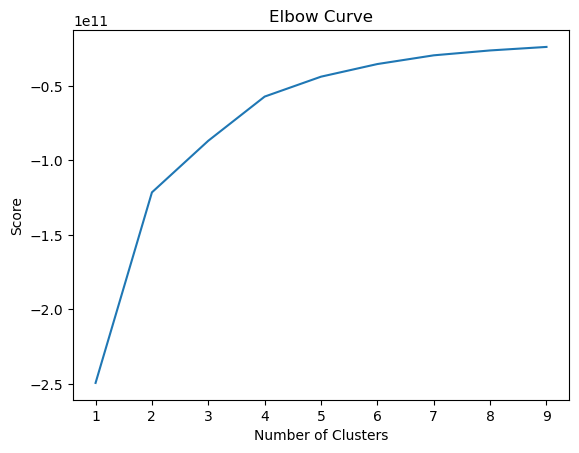

In [49]:
# plot elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### K-means

In [50]:
# create k-means object
kmeans = KMeans(n_clusters = 3) 

In [51]:
# fit object to rus6
kmeans.fit(rus6)

/Users/kaitlinkendrick/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [52]:
# fit clusters into dataframe
rus6['clusters'] = kmeans.fit_predict(rus6)

/Users/kaitlinkendrick/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
rus6.head()

,Product_code,Retail_price,Size,ABV,Amount,Sale_amount,Profit,clusters
0,5028,300.0,0.375,4.5,2.0,420.00,140.00,1
1,5028,300.0,0.375,4.5,4.0,960.00,400.00,1
2,5028,300.0,0.375,4.5,5.0,1440.00,740.00,1
3,4846,200.0,0.330,3.0,4.0,412.23,52.23,1
4,4846,200.0,0.330,3.0,2.0,360.00,180.00,1


In [54]:
rus6['clusters'].value_counts()

1    12750
0     2634
2      622
Name: clusters, dtype: int64

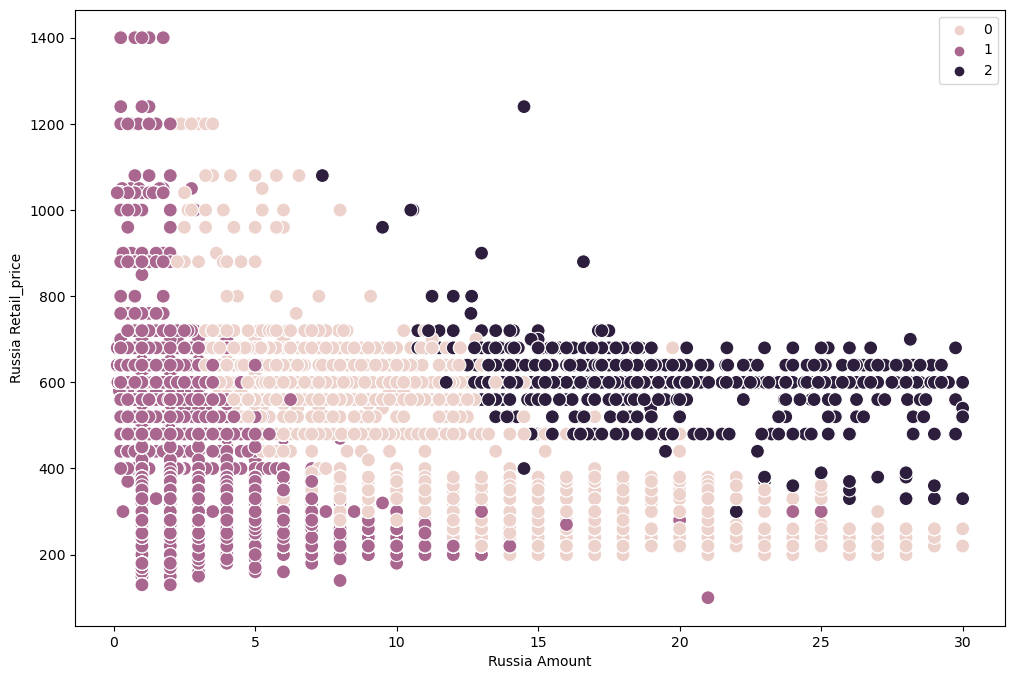

In [55]:
# plot clusters for Amount and Retail_price
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=rus6['Amount'], y=rus6['Retail_price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Russia Amount') 
plt.ylabel('Russia Retail_price')
plt.show()

In [56]:
# fit object to other6
kmeans.fit(other6)

/Users/kaitlinkendrick/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [57]:
# fit clusters into dataframe
other6['clusters'] = kmeans.fit_predict(other6)

/Users/kaitlinkendrick/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
other6.head()

,Product_code,Retail_price,Size,ABV,Amount,Sale_amount,Profit,clusters
2,4302,630.0,0.473,8.5,4.0,1133.98,-214.02,0
3,4302,630.0,0.473,8.5,1.0,409.49,72.49,0
4,4302,630.0,0.473,8.5,1.0,377.85,40.85,0
5,4302,630.0,0.473,8.5,1.0,501.67,164.67,0
6,4304,630.0,0.473,8.5,1.0,377.95,40.95,0


In [59]:
other6['clusters'].value_counts()

0    24648
2     2277
1      410
Name: clusters, dtype: int64

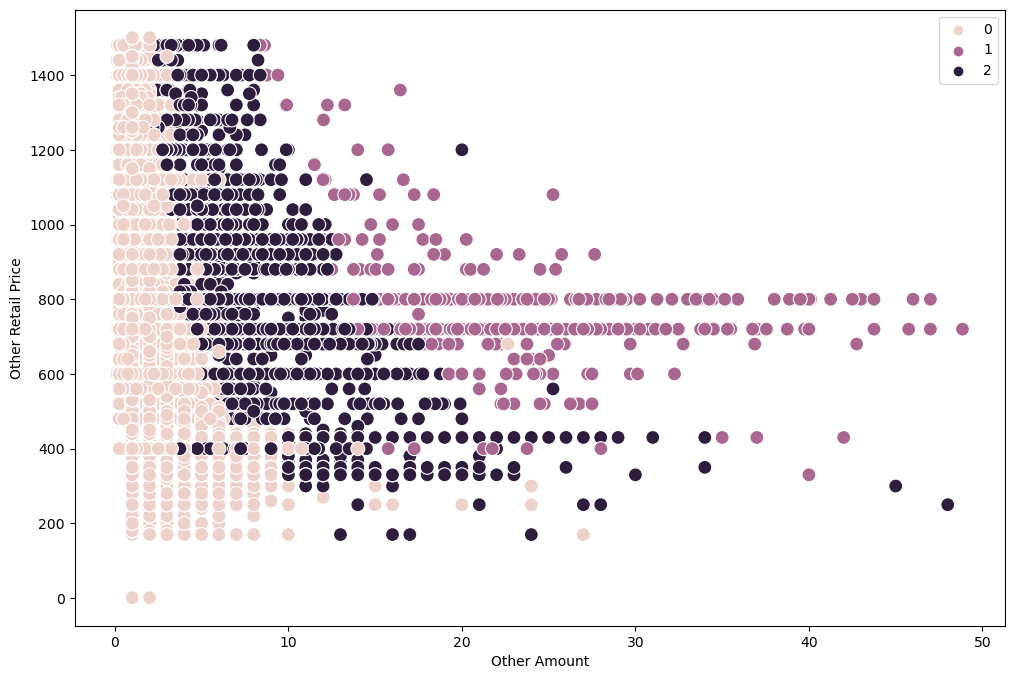

In [60]:
# plot clusters for tripduration and endstationid
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=other6['Amount'], y=other6['Retail_price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Other Amount') 
plt.ylabel('Other Retail Price')
plt.show()

These clusters in both charts make sense. Cluster 0 is beers that sell less, cluster 1 sells the most, and cluster 2 is in between. What is intersting from these at a glance is that it appears customers are willing to spend more on non-russian beer as the more expensive beers from outside of Russia sell at a higher amount than Russian beers. There seems to be a top amount customers are willing to pay for Russian beers that doesn't exist when applied to beers crafted outside of Russia. 

### Descriptive Statistics

In [61]:
# rename clusters with color names
rus6.loc[rus6['clusters'] == 0, 'cluster'] = 'very light pink'
rus6.loc[rus6['clusters'] == 1, 'cluster'] = 'pink'
rus6.loc[rus6['clusters'] == 2, 'cluster'] = 'purple'

In [62]:
rus6.groupby('cluster').agg({'Retail_price':['mean', 'median'], 
                         'Size':['mean', 'median'], 
                         'ABV':['mean', 'median'],
                          'Amount':['mean', 'median'],
                            'Sale_amount':['mean', 'median'],
                          'Profit':['mean', 'median']})

Retail_price             Size              ABV         \
                        mean median      mean median      mean median   
cluster                                                                 
pink              356.625098  300.0  0.563570    0.5  6.457329    6.0   
purple            597.829582  600.0  0.982042    1.0  6.510852    6.5   
very light pink   474.662111  520.0  0.785243    1.0  6.402715    6.0   

                    Amount         Sale_amount                 Profit  \
                      mean median         mean    median         mean   
cluster                                                                 
pink              2.749031    2.0   723.794414   540.000   332.596216   
purple           18.853066   17.7  9897.272379  9262.830  5387.716592   
very light pink  10.231705    9.0  3702.808929  3411.145  1881.056336   

                           
                   median  
cluster                    
pink              254.910  
purple           4919.600  
very light pink  1731.375

In [63]:
# rename clusters with color names
other6.loc[other6['clusters'] == 0, 'cluster'] = 'very light pink'
other6.loc[other6['clusters'] == 1, 'cluster'] = 'pink'
other6.loc[other6['clusters'] == 2, 'cluster'] = 'purple'

In [64]:
other6.groupby('cluster').agg({'Retail_price':['mean', 'median'], 
                         'Size':['mean', 'median'], 
                         'ABV':['mean', 'median'],
                          'Amount':['mean', 'median'],
                            'Sale_amount':['mean', 'median'],
                          'Profit':['mean', 'median']})

Retail_price             Size              ABV         \
                        mean median      mean median      mean median   
cluster                                                                 
pink              769.829268  720.0  0.993878  1.000  6.040244    5.4   
purple            812.740448  800.0  1.034756  1.000  6.412727    6.0   
very light pink   570.040133  450.0  0.587057  0.355  6.702296    6.0   

                    Amount          Sale_amount                 Profit  \
                      mean median          mean    median         mean   
cluster                                                                  
pink             22.377720  20.50  15627.958024  13984.36  8463.520780   
purple            7.915105   6.75   5196.745788   4625.30  2550.925718   
very light pink   1.697266   1.00    748.385638    535.33   306.257633   

                          
                  median  
cluster                   
pink             7577.96  
purple           2239.97  
very light pink   205.45

Comparing Russian beers to non-Russian beers confirms my earlier thought that customers are willing to spend more on non-Russian beers. In almost every cluster non-Russian beers bring in more profits and have higher retail prices than Russian beers. In both categories the pink cluster performs best in terms of profit and amounts sold. Expanding the selection of non-Russian beers would increase profits and customers have proven they're willing to pay for it.

In [65]:
rus6.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'russia_cluster.csv'))

In [66]:
other6.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'other_cluster.csv'))